# Microsoft Movie Analysis Notebook
### Nick, Chris, Samira
# INTRODUCTION

## General Overview
The movie industry is know to many as one of the largest entertainment sectors in the world, projecting a market size measured in revenue as $18.2B in the year of 2022. Whether it's user streaming or general film production, there are a wide array of factors to consider before making a decision as to whether the film industry would be a lucrative entry point for Microsoft Corportation to make.



## Business Understanding
One of the key deciding factors for Microsoft as a key stakeholder is the potential for long term growth. As a business that made $168B in revenue during the year of 2021, there is no doubt that the main factor for Microsoft's decision to enter the market is whether it can contribute to long term growth in their portfolio. As a team, we decided that these are the key questions to consider. Should Microsoft Movie corporation consider entering the foreign film market or remain within the domestic market before they build a solid portfolio? Which genres and what facet of the genre drives it's profitability? How are ratings related to film profitability? All of these are initial questions associated with revenue growth and profitability.



## Data Understanding
We utilized two main data sets. The first database we used was The Movie Database API, the second database was from The Numbers: Where Data and the Movie Business Meet. The third data set we used was from the Internet Movie Database (IMDB). TMDb API is a large database that contains information ranging from genre and actors writer and director. From this set of data we were able to extract information associated with genre to understand which genres were more lucrative. We created a boolean based on movie title to see whether animated movies compared to regular movies within the same genre performed better. From The Numbers Budget dataset, we were able to web scrape the release date, movie title, production budget, domestic gross earnings, and the worldwide earnings. For the purposes of this project, this dataset was helpful in extracting the financials as a necessary means to filter an analyze foreign and domestic markets. Some important features and limitations that come from this data set come from how we can interpret financial indicators. In the case of the budgets associated with domestic and foreign markets, we found that it was important to strictly analyze within the time frame of 2014 to 2018. Our financial indicators do not account for inflation, however based of of this time frame, there was a 6% price increase. Since all of our values are calculated in USD, we can say 1 USD in 2014 is equivalent to 1.06 in 2018.



## Methods
We imported data from both of these sources and merged them together, removing unneceesary data and duplicates to make a consistent analysis along all of our probing questions. We were able to use statistics and visualizations to gain keener insights into the trends associated with our pivotal factors. We were able to assess which genre types were the most lucrative along with whether foreign markets or domestic markets provided a larger portfolio.

# Phase 1 Project Data Cleaning, Exploration and Visualizations

## 1) Imports


In [2]:
# Import standard packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

## 2) Data Cleaning

## Load DataFrame with Sales Figures & Production Costs

In [3]:
# Load data file.
df = pd.read_csv('tn.movie_budgets.csv')

# Remove "$" and "," from production_budget columns & convert to millions.
df['production_budget'] = df['production_budget'].str.replace(' ', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str[:-6]

# Remove "$" and "," from domestic_gross columns & convert to millions.
df['domestic_gross'] = df['domestic_gross'].str.replace(' ', '')
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '')
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '')
df['domestic_gross'] = df['domestic_gross'].str[:-6]

# Remove "$" and "," from worldwide_gross columns & convert to millions.
df['worldwide_gross'] = df['worldwide_gross'].str.replace(' ', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str[:-6]

# Filter blank strings.
df = df[df.production_budget != '']
df = df[df.worldwide_gross != '']
df = df[df.domestic_gross != '']

# Change figures from str to int class type.
df['production_budget'] = df['production_budget'].astype(int)
df['domestic_gross'] = df['domestic_gross'].astype(int)
df['worldwide_gross'] = df['worldwide_gross'].astype(int)

# Create international_gross col.
df['international_gross'] = df['worldwide_gross'] - df['domestic_gross']

# Filter international_gross.
df = df[df.international_gross != 0]

# Confirm.
df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,18-Dec-09,Avatar,425,760,2776,2016
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410,241,1045,804
2,3,7-Jun-19,Dark Phoenix,350,42,149,107
3,4,1-May-15,Avengers: Age of Ultron,330,459,1403,944
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317,620,1316,696
...,...,...,...,...,...,...,...
5242,43,3-Aug-05,Junebug,1,2,3,1
5243,44,1-Aug-08,Frozen River,1,2,6,4
5244,45,21-Nov-01,Sidewalks of New York,1,2,3,1
5246,47,29-Sep-00,The Broken Hearts Club: A Romantic Comedy,1,1,2,1


## Load DataFrame with Genre Data

In [4]:
# Load genre file.
genre_df = pd.read_csv('tmdb.movies.csv')

# Filter to relevant columns.
genre_df = genre_df[['genre_ids', 'title']]

# Replace genre id with corresponding genre.
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('12', 'adventure')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('14', 'fantasy')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('16', 'animation')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('18', 'drama')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('27', 'horror')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('28', 'action')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('35', 'comedy')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('36', 'history')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('37', 'western')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('53', 'thriller')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('80', 'crime')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('99', 'documentary')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('878', 'sci-fi')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('9648', 'mystery')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('10402', 'music')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('10749', 'romance')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('10751', 'family')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('10752', 'war')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('10770', 'tv movie')

# Confirm changes.
genre_df

,genre_ids,title
0,"[adventure, fantasy, family]",Harry Potter and the Deathly Hallows: Part 1
1,"[fantasy, adventure, animation, family]",How to Train Your Dragon
2,"[adventure, action, sci-fi]",Iron Man 2
3,"[animation, comedy, family]",Toy Story
4,"[action, sci-fi, adventure]",Inception
...,...,...
26512,"[horror, drama]",Laboratory Conditions
26513,"[drama, thriller]",_EXHIBIT_84xxx_
26514,"[fantasy, action, adventure]",The Last One
26515,"[family, adventure, action]",Trailer Made


## Create New List that Contains Movies Found in Both DataFrames

In [5]:
# Create list for with same title for merging.
same_title_list = []

#convert both title columns to lists for conversion later.
genre_title_list = genre_df['title'].tolist()
gross_title_list = df['movie'].tolist()

# Create duplicate title list.
for title in genre_title_list:
    for movie in gross_title_list:
        if title == movie:
            same_title_list.append(title)
        else:
            continue

# Print current list length.
print("Orignal list count: " + str(len(same_title_list)))

# Remove duplicates from list.
same_title_list = list(dict.fromkeys(same_title_list))

# Print new list length.
print("New list count: " + str(len(same_title_list)))

Orignal list count: 1565
New list count: 1276


## Reduce Genre DataFrame to Movies Found in Both DataFrames

In [6]:
# Reduce to genre_df to movies found in both dataframes.
genre_df = genre_df[genre_df['title'].isin(same_title_list)]

# Confirm changes.
genre_df

,genre_ids,title
1,"[fantasy, adventure, animation, family]",How to Train Your Dragon
2,"[adventure, action, sci-fi]",Iron Man 2
3,"[animation, comedy, family]",Toy Story
4,"[action, sci-fi, adventure]",Inception
5,"[adventure, fantasy, family]",Percy Jackson & the Olympians: The Lightning T...
...,...,...
26323,[],The Box
26339,"[documentary, documentary]",The Judge
26413,[horror],Wolf
26425,[music],The Box


## Reduce Sales/Production DataFrame to Movies Found in Both DataFrames

In [7]:
# Reduce to df to movies found in both dataframes
df = df[df['movie'].isin(same_title_list)]

# Confirm changes
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,18-Dec-09,Avatar,425,760,2776,2016
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410,241,1045,804
3,4,1-May-15,Avengers: Age of Ultron,330,459,1403,944
6,7,27-Apr-18,Avengers: Infinity War,300,678,2048,1370
8,9,17-Nov-17,Justice League,300,229,655,426
...,...,...,...,...,...,...,...
5230,31,25-Sep-15,The Green Inferno,1,7,12,5
5231,32,3-Feb-17,I Am Not Your Negro,1,7,9,2
5232,33,19-Oct-12,The Sessions,1,6,11,5
5241,42,21-Oct-11,Martha Marcy May Marlene,1,2,5,3


## Clean Column Titles for Merging

In [8]:
# Rename genre_df 'title' column to 'movie in prep for merge
genre_df = genre_df.rename(columns={'title' : 'movie'})

# Confirm changes
print(genre_df.head())
df

                                 genre_ids  \
1  [fantasy, adventure, animation, family]   
2              [adventure, action, sci-fi]   
3              [animation, comedy, family]   
4              [action, sci-fi, adventure]   
5             [adventure, fantasy, family]   

                                               movie  
1                           How to Train Your Dragon  
2                                         Iron Man 2  
3                                          Toy Story  
4                                          Inception  
5  Percy Jackson & the Olympians: The Lightning T...  


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,18-Dec-09,Avatar,425,760,2776,2016
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410,241,1045,804
3,4,1-May-15,Avengers: Age of Ultron,330,459,1403,944
6,7,27-Apr-18,Avengers: Infinity War,300,678,2048,1370
8,9,17-Nov-17,Justice League,300,229,655,426
...,...,...,...,...,...,...,...
5230,31,25-Sep-15,The Green Inferno,1,7,12,5
5231,32,3-Feb-17,I Am Not Your Negro,1,7,9,2
5232,33,19-Oct-12,The Sessions,1,6,11,5
5241,42,21-Oct-11,Martha Marcy May Marlene,1,2,5,3


## Merge Data Frames

In [9]:
# Merge dataframes into one dataframe, "merged_df".
merged_df = pd.merge(df, genre_df, on = 'movie', how = 'outer')

# Print new dataframe length.
print("Combined DataFrame length is: " + str(len(merged_df)))

Combined DataFrame length is: 1565


In [10]:
# Drop duplicates.
merged_df.drop_duplicates(subset = 'movie', keep = False, inplace = True)

# Confirm results.
merged_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,genre_ids
0,1,18-Dec-09,Avatar,425,760,2776,2016,"[action, adventure, fantasy, sci-fi]"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410,241,1045,804,"[adventure, action, fantasy]"
2,4,1-May-15,Avengers: Age of Ultron,330,459,1403,944,"[action, adventure, sci-fi]"
3,7,27-Apr-18,Avengers: Infinity War,300,678,2048,1370,"[adventure, action, fantasy]"
8,11,20-Jul-12,The Dark Knight Rises,275,448,1084,636,"[action, crime, drama, thriller]"
...,...,...,...,...,...,...,...,...
1557,29,20-Jul-18,Unfriended: Dark Web,1,8,16,8,[horror]
1558,31,25-Sep-15,The Green Inferno,1,7,12,5,"[action, adventure, horror, thriller]"
1559,32,3-Feb-17,I Am Not Your Negro,1,7,9,2,[documentary]
1560,33,19-Oct-12,The Sessions,1,6,11,5,"[drama, romance, comedy]"


## Load Nick's DataFrame Which Combined Ours Together

In [11]:
# Load file.
fnl_df = pd.read_csv('master_data_raw.csv')

# Select relevant columns for data exploration.
fnl_df = fnl_df[['movie_CH', 'production_budget_CH', 'domestic_gross_CH', 'worldwide_gross_CH', 'international_gross', 'release_date',
                 'runtime_minutes', 'studio', 'genres', 'Action',
                 'Animation', 'Comedy','Family']]

# Test.
fnl_df

,movie_CH,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,release_date,runtime_minutes,studio,genres,Action,Animation,Comedy,Family
0,NaN,NaN,NaN,NaN,NaN,12/31/2012,91.0,NaN,"Action,Animation,Comedy",True,True,True,False
1,NaN,NaN,NaN,NaN,NaN,8/18/1995,NaN,NaN,"Action,Adventure,Fantasy",True,False,False,False
2,NaN,NaN,NaN,NaN,NaN,6/19/2015,88.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,3/22/2013,124.0,IFC,"Adventure,Drama,Romance",False,False,False,False
4,The Secret Life of Walter Mitty,91.0,58.0,187.0,129.0,12/25/2013,114.0,Fox,"Adventure,Comedy,Drama",False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,NaN,NaN,NaN,NaN,NaN,9/20/2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3893,NaN,NaN,NaN,NaN,NaN,4/21/2017,NaN,NaN,Drama,False,False,False,False
3894,NaN,NaN,NaN,NaN,NaN,3/13/2007,NaN,NaN,Documentary,False,False,False,False
3895,NaN,NaN,NaN,NaN,NaN,8/4/2017,85.0,NaN,Comedy,False,False,True,False


In [12]:
# Drop NaN & duplicates
fnl_df.dropna(axis=0, how = 'any', inplace=True)
fnl_df.drop_duplicates(subset = 'movie_CH', keep = False, inplace = True)

# Add profit column
fnl_df['profit'] = fnl_df['worldwide_gross_CH'] - fnl_df['production_budget_CH']

# Remove unused genres for graphing purposes.
fnl_df['genres'] = fnl_df['genres'].str.replace('Adventure', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Horror', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Mystery', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Thriller', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Musical', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Romance', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Fantasy', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('War', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Sci-Fi', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Western', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Drama', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Music', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Documentary', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Biography', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Sport', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Crime', '')
fnl_df['genres'] = fnl_df['genres'].str.replace(',', '')

# Confirm Results.
fnl_df

,movie_CH,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,release_date,runtime_minutes,studio,genres,Action,Animation,Comedy,Family,profit
4,The Secret Life of Walter Mitty,91.0,58.0,187.0,129.0,12/25/2013,114.0,Fox,Comedy,False,False,True,False,96.0
5,A Walk Among the Tombstones,28.0,26.0,62.0,36.0,9/19/2014,114.0,Uni.,Action,True,False,False,False,34.0
6,Jurassic World,215.0,652.0,1648.0,996.0,6/12/2015,124.0,Uni.,Action,True,False,False,False,1433.0
7,The Rum Diary,45.0,13.0,21.0,8.0,10/28/2011,119.0,FD,Comedy,False,False,True,False,-24.0
8,The Three Stooges,30.0,44.0,54.0,10.0,4/13/2012,92.0,Fox,ComedyFamily,False,False,True,True,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,Uncle Drew,18.0,42.0,46.0,4.0,6/29/2018,103.0,LG/S,Comedy,False,False,True,False,28.0
3523,BlacKkKlansman,15.0,49.0,93.0,44.0,8/10/2018,135.0,Focus,,False,False,False,False,78.0
3534,"Paul, Apostle of Christ",5.0,17.0,25.0,8.0,3/23/2018,108.0,Affirm,,False,False,False,False,20.0
3541,Instant Family,48.0,67.0,119.0,52.0,11/16/2018,118.0,Par.,Comedy,False,False,True,False,71.0


# 3) Data Exploration

## Set Up DataFrames by Genre (Animation)

In [13]:
# Set up new df for genre.
action_df = fnl_df[(fnl_df['Action'] == True) & (fnl_df['Animation'] != True)]

# Establish new data points for genre. 
action_movies = len(action_df)
action_prod = sum(action_df['production_budget_CH'])
action_salesd = sum(action_df['domestic_gross_CH']) 
action_salesw = sum(action_df['worldwide_gross_CH'])
action_salesi = sum(action_df['international_gross'])
total_action_profit = action_salesw - action_prod
film_action_profit = total_action_profit / action_movies

print(f' Average profit per Action film is roughly {round(film_action_profit)}M' )

 Average profit per Action film is roughly 192M


In [14]:
# Set up new df for genre
a_action_df = fnl_df[(fnl_df['Action'] == True) & (fnl_df['Animation'] == True)]

# Establish new data points for genre 
a_action_movies = len(a_action_df)
a_action_prod = sum(a_action_df['production_budget_CH'])
a_action_salesd = sum(a_action_df['domestic_gross_CH']) 
a_action_salesw = sum(a_action_df['worldwide_gross_CH'])
a_action_salesi = sum(a_action_df['international_gross'])
a_total_action_profit = a_action_salesw - a_action_prod
a_film_action_profit = a_total_action_profit / a_action_movies

print(f' Average profit per Animated Action film is roughly {round(a_film_action_profit)}M' )

 Average profit per Animated Action film is roughly 328M


In [15]:
# Set up new df for genre
animation_df = fnl_df[(fnl_df['Animation'] == True)]

# Establish new data points for genre 
animation_movies = len(animation_df)
animation_prod = sum(animation_df['production_budget_CH'])
animation_salesd = sum(animation_df['domestic_gross_CH']) 
animation_salesw = sum(animation_df['worldwide_gross_CH'])
animation_salesi = sum(animation_df['international_gross'])
total_animation_profit = animation_salesw - animation_prod
film_animation_profit = total_animation_profit / animation_movies

print(f' Average profit per Animated film is roughly {round(film_animation_profit)}M' )

 Average profit per Animated film is roughly 300M


In [16]:
# Set up new df for genre
comedy_df = fnl_df[(fnl_df['Comedy'] == True) & (fnl_df['Animation'] != True)]

# Establish new data points for genre 
comedy_movies = len(comedy_df)
comedy_prod = sum(comedy_df['production_budget_CH'])
comedy_salesd = sum(comedy_df['domestic_gross_CH']) 
comedy_salesw = sum(comedy_df['worldwide_gross_CH'])
comedy_salesi = sum(comedy_df['international_gross'])
total_comedy_profit = comedy_salesw - comedy_prod
film_comedy_profit = total_comedy_profit / comedy_movies

print(f' Average profit per Comedy film is roughly {round(film_comedy_profit)}M' )

 Average profit per Comedy film is roughly 76M


In [17]:
# Set up new df for genre
a_comedy_df = fnl_df[(fnl_df['Comedy'] == True) & (fnl_df['Animation'] == True)]

# Establish new data points for genre 
a_comedy_movies = len(a_comedy_df)
a_comedy_prod = sum(a_comedy_df['production_budget_CH'])
a_comedy_salesd = sum(a_comedy_df['domestic_gross_CH']) 
a_comedy_salesw = sum(a_comedy_df['worldwide_gross_CH'])
a_comedy_salesi = sum(a_comedy_df['international_gross'])
a_total_comedy_profit = a_comedy_salesw - a_comedy_prod
a_film_comedy_profit = a_total_comedy_profit / a_comedy_movies

print(f' Average profit per Animated Comedy film is roughly {round(a_film_comedy_profit)}M' )

 Average profit per Animated Comedy film is roughly 294M


In [18]:
# Set up new df for genre
family_df = fnl_df[(fnl_df['Family'] == True) & (fnl_df['Animation'] != True)]

# Establish new data points for genre 
family_movies = len(family_df)
family_prod = sum(family_df['production_budget_CH'])
family_salesd = sum(family_df['domestic_gross_CH']) 
family_salesw = sum(family_df['worldwide_gross_CH'])
family_salesi = sum(family_df['international_gross'])
total_family_profit = family_salesw - family_prod
film_family_profit = total_family_profit / family_movies

print(f' Average profit per Family film is roughly {round(film_family_profit)}M' )

 Average profit per Family film is roughly 108M


In [19]:
# Set up new df for genre
a_family_df = fnl_df[(fnl_df['Family'] == True) & (fnl_df['Animation'] == True)]

# Establish new data points for genre 
a_family_movies = len(a_family_df)
a_family_prod = sum(a_family_df['production_budget_CH'])
a_family_salesd = sum(a_family_df['domestic_gross_CH']) 
a_family_salesw = sum(a_family_df['worldwide_gross_CH'])
a_family_salesi = sum(a_family_df['international_gross'])
a_total_family_profit = a_family_salesw - a_family_prod
a_film_family_profit = a_total_family_profit / a_family_movies

print(f' Average profit per Family film is roughly {round(a_film_family_profit)}M' )

 Average profit per Family film is roughly 208M


In [20]:
# Creating lists to store total movie values.
all_movies = [action_movies, comedy_movies, family_movies]
all_animated_movies = [a_action_movies, a_comedy_movies, a_family_movies]
all_profit = [total_action_profit, total_comedy_profit, total_family_profit]
all_animated_profit = [a_total_action_profit, a_total_comedy_profit, a_total_family_profit]

# Calculations for presentation.
total_movies = sum(all_movies)
total_animated_movies = sum(all_animated_movies)

total_movie_profit = sum(all_profit)
total_animated_profit = sum(all_animated_profit)

film_avg_profit = total_movie_profit / total_movies
a_film_avg_profit = total_animated_profit / total_animated_movies

avg_animated_profit_increase = a_film_avg_profit / film_avg_profit
avg_increase_per_film = a_film_avg_profit - film_avg_profit



# Looking at values.
print(f'Total movies that meet our criteria {total_movies+total_animated_movies}')
print(f'You can expect roughly {round(avg_animated_profit_increase, 2)} times more profit when animating (120% increase).')

Total movies that meet our criteria 607
You can expect roughly 2.2 times more profit when animating (120% increase).


# Foreign and Domestic Market Analysis

In [21]:
#let's load our cleaned data frame and looking at the rows and columns. 
#In this set we can see the columns associated with our variables in question. 

masterdf = pd.read_csv('master_data_raw.csv')
masterdf

,Unnamed: 0,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,...,Animation,averagerating,numvotes,release_date_CH,movie_CH,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,genre_ids
0,0,foodfight!,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,12/31/2012,...,True,1.9,8248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,mortal kombat,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,8/18/1995,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,the overnight,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,6/19/2015,...,NaN,7.5,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,on the road,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,3/22/2013,...,False,6.1,37886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,the secret life of walter mitty,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,12/25/2013,...,False,7.3,275300.0,25-Dec-13,The Secret Life of Walter Mitty,91.0,58.0,187.0,129.0,"[adventure, comedy, drama, fantasy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,3892,trapped,tt9877596,Trapped,Trapped,2016,NaN,NaN,87,9/20/2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3893,3893,the promise,tt9889072,The Promise,The Promise,2017,NaN,Drama,78,4/21/2017,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3894,3894,sublime,tt9893078,Sublime,Sublime,2019,NaN,Documentary,30,3/13/2007,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3895,3895,columbus,tt9899880,Columbus,Columbus,2018,85.0,Comedy,93,8/4/2017,...,False,5.8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Let's now look at the data types associated with our domestic gross revenue, our foreign gross revenue, and our worldwide gross revenue

masterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3897 non-null   int64  
 1   clean_title           3897 non-null   object 
 2   movie_id              3897 non-null   object 
 3   primary_title         3897 non-null   object 
 4   original_title        3896 non-null   object 
 5   start_year            3897 non-null   int64  
 6   runtime_minutes       3401 non-null   float64
 7   genres                3824 non-null   object 
 8   id                    3897 non-null   int64  
 9   release_date          3897 non-null   object 
 10  movie                 3897 non-null   object 
 11  production_budget     3897 non-null   int64  
 12  domestic_gross        3897 non-null   int64  
 13  worldwide_gross       3897 non-null   int64  
 14  foreign_gross         3897 non-null   int64  
 15  title                

In [23]:
#our selected release date is in object format...we want to change that to an integer, so we use the below setup
import datetime
masterdf['release_date'] = pd.DatetimeIndex(masterdf['release_date']).year
masterdf['release_date']

0       2012
1       1995
2       2015
3       2013
4       2013
        ... 
3892    2002
3893    2017
3894    2007
3895    2017
3896    2010
Name: release_date, Length: 3897, dtype: int64

# 4) Create Visuals

## Clean Genres Specific DataFrames for Visuals (Animation)

In [24]:
# Setting up columns for graphing.
family_df.loc[:,'genres'] = 'Family'
a_family_df.loc[:,'genres'] = 'Animation/Family'
comedy_df.loc[:,'genres'] = 'Comedy'
a_comedy_df.loc[:,'genres'] = 'Animation/Comedy'
action_df.loc[:,'genres'] = 'Action'
a_action_df.loc[:,'genres'] = 'Animated/Action'

C:\Users\helme\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [25]:
# Create copy of fnl_df for clean genres.
clean_genres_df = fnl_df.copy()

# Convert filtered dataframe data in tuples for cleaned genres.
cg_family = tuple(zip(family_df.movie_CH, family_df.genres))
cg_a_family = tuple(zip(a_family_df.movie_CH, a_family_df.genres))
cg_comedy = tuple(zip(comedy_df.movie_CH, comedy_df.genres))
cg_a_comedy = tuple(zip(a_comedy_df.movie_CH, a_comedy_df.genres))
cg_action = tuple(zip(action_df.movie_CH, action_df.genres))
cg_a_action = tuple(zip(a_action_df.movie_CH, a_action_df.genres))

# Combine tuples.
all_genres_tup = cg_family + cg_a_family + cg_comedy + cg_a_comedy + cg_action + cg_a_action

# Confirm results.
len(all_genres_tup)

607

In [26]:
# Create DataFrame with cleaned genres to be merged.
df_merge_genres = pd.DataFrame(list(all_genres_tup), columns=['movie_CH', 'genres'])

# Confirm results.
df_merge_genres

,movie_CH,genres
0,The Three Stooges,Family
1,Real Steel,Family
2,Furry Vengeance,Family
3,Ramona and Beezus,Family
4,Percy Jackson & the Olympians: The Lightning T...,Family
...,...,...
602,Kung Fu Panda 3,Animated/Action
603,The Lego Ninjago Movie,Animated/Action
604,Incredibles 2,Animated/Action
605,The Lego Batman Movie,Animated/Action


## Merge DataFrames For Visualizations (Animation)

In [27]:
# Merge DataFrames for boxplot.
fnl_merged_df = pd.merge(clean_genres_df, df_merge_genres, on = 'movie_CH', how = 'outer')

# Drop NaN.
fnl_merged_df.dropna(axis=0, how = 'any', inplace=True)

# Confirm we still have 607 movies.
fnl_merged_df

,movie_CH,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,release_date,runtime_minutes,studio,genres_x,Action,Animation,Comedy,Family,profit,genres_y
0,The Secret Life of Walter Mitty,91.0,58.0,187.0,129.0,12/25/2013,114.0,Fox,Comedy,False,False,True,False,96.0,Comedy
1,A Walk Among the Tombstones,28.0,26.0,62.0,36.0,9/19/2014,114.0,Uni.,Action,True,False,False,False,34.0,Action
2,Jurassic World,215.0,652.0,1648.0,996.0,6/12/2015,124.0,Uni.,Action,True,False,False,False,1433.0,Action
3,The Rum Diary,45.0,13.0,21.0,8.0,10/28/2011,119.0,FD,Comedy,False,False,True,False,-24.0,Comedy
4,The Three Stooges,30.0,44.0,54.0,10.0,4/13/2012,92.0,Fox,ComedyFamily,False,False,True,True,24.0,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Green Book,23.0,85.0,322.0,237.0,11/16/2018,130.0,Uni.,Comedy,False,False,True,False,299.0,Comedy
828,A Simple Favor,20.0,53.0,97.0,44.0,9/14/2018,117.0,LGF,Comedy,False,False,True,False,77.0,Comedy
830,Destroyer,9.0,1.0,3.0,2.0,12/25/2018,121.0,Annapurna,Action,True,False,False,False,-6.0,Action
832,Uncle Drew,18.0,42.0,46.0,4.0,6/29/2018,103.0,LG/S,Comedy,False,False,True,False,28.0,Comedy


## Create Boxplot (Animation)

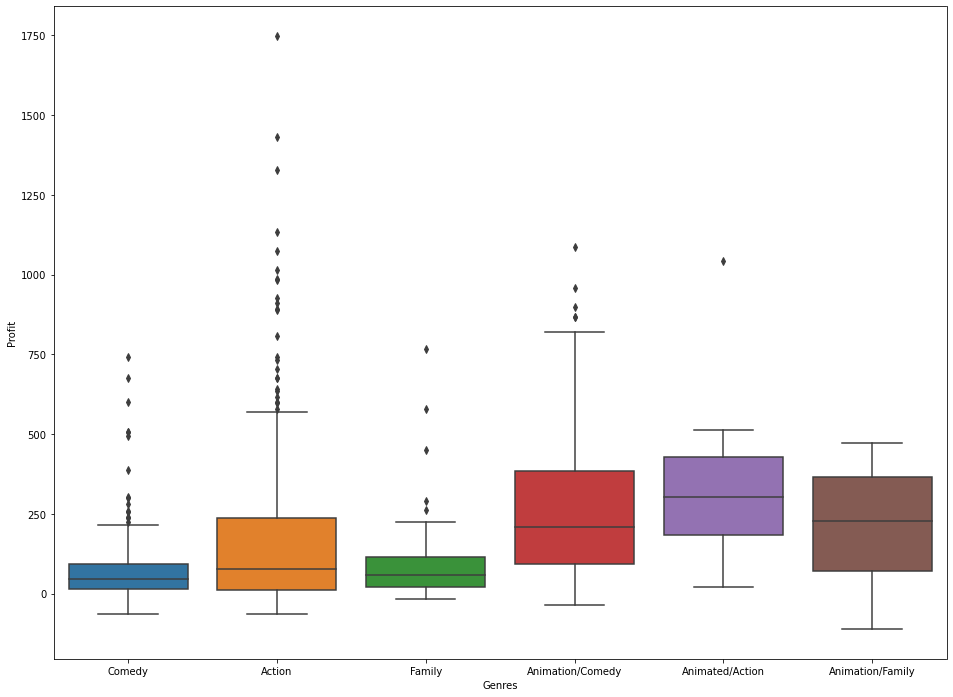

In [28]:
fnl_merged_df = fnl_merged_df.rename(columns={'genres_y':'Genres', 'profit':'Profit'})

fig, ax = plt.subplots(figsize=(16,12))

g = sns.boxplot(data=fnl_merged_df, x = 'Genres', y='Profit')

## Refine Boxplot for Presentation (Animation)

In [29]:
# Define function to determine outliers
def outliers(df, col):
    Q1= df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

# Apply outlier function to 'Profit' data
upper, lower = outliers(fnl_merged_df, "Profit")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  456.25
Lower Whisker:  -245.75


In [30]:
# Filter outliers with function. Upper outliers are so high that none of the lower outliers are filtered with function
# so I manually adjust lower whisker to -100M 'Profit'
no_outlier_df = fnl_merged_df[(fnl_merged_df['Profit'] > -100) & (fnl_merged_df['Profit'] < upper)]

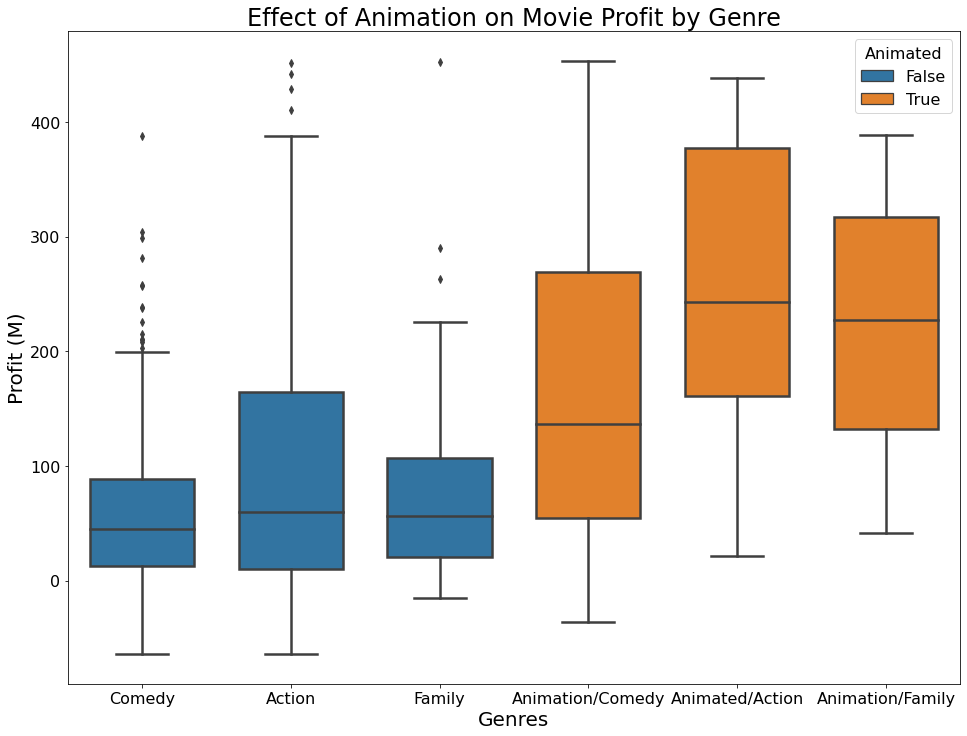

In [31]:
# Set up Boxplot dimensions
plt.rc('font', size=16)
plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

# Create Boxplot
fig, ax = plt.subplots(figsize=(16,12))

g = sns.boxplot(data=no_outlier_df, x = 'Genres', y='Profit', width=.7, linewidth=2.5, hue='Animation', dodge=False, )
ax.set_ylabel("Profit (M)")
plt.legend(title = "Animated")
plt.title('Effect of Animation on Movie Profit by Genre');

## Foreign vs Domestic Visuals

In [32]:
#now we want to create our visualizaiton to be filtered with years between 2014 and 2018
#we created the variable xrange in order to look at the years 2014 to 2018. 
#IMPORTANT: we chose this range of years because it allowed us to analyze the 2014 to 2018 
#we grabbing earnings from a time when streaming became a social norm, but also because 2014 was the beginning of when our potential competitor Netflix started their very own movie studio.

yr2014_yr2018 = masterdf[(masterdf['release_date'] >= 2014) & (masterdf['release_date'] <= 2018)]
xrange = yr2014_yr2018['release_date']
xrange

2       2015
5       2014
6       2015
17      2014
21      2015
        ... 
3883    2016
3885    2015
3890    2015
3893    2017
3895    2017
Name: release_date, Length: 1477, dtype: int64

In [33]:
#now we can analyze our data information associated with our specified time frame by calling .info()
yr2014_yr2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 2 to 3895
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1477 non-null   int64  
 1   clean_title           1477 non-null   object 
 2   movie_id              1477 non-null   object 
 3   primary_title         1477 non-null   object 
 4   original_title        1477 non-null   object 
 5   start_year            1477 non-null   int64  
 6   runtime_minutes       1356 non-null   float64
 7   genres                1457 non-null   object 
 8   id                    1477 non-null   int64  
 9   release_date          1477 non-null   int64  
 10  movie                 1477 non-null   object 
 11  production_budget     1477 non-null   int64  
 12  domestic_gross        1477 non-null   int64  
 13  worldwide_gross       1477 non-null   int64  
 14  foreign_gross         1477 non-null   int64  
 15  title                

In [34]:
#Let's specifically look at the foreign gross aspect of our data within this time frame
print(yr2014_yr2018['foreign_gross'])

2           56188
5        36090902
6       996584239
17       21449831
21         446787
          ...    
3883     98883179
3885       208672
3890     18986015
3893      2327129
3895        93404
Name: foreign_gross, Length: 1477, dtype: int64


Now it's time to do some Statistical Analysis associated with Foreign and Domestic Gross Reveues for our time frame. Let's begin with lookng at the mean. As you can see the mean for Foreign Gross Revenue is much higher than that of domestic

In [35]:
fogrssmn = yr2014_yr2018['foreign_gross'].sum()/5
dogrssmn = yr2014_yr2018['domestic_gross'].sum()/5

print(fogrssmn)
print(dogrssmn)

20393201726.4
13948292452.8


The mean only gives us some of the picture. To confirm that Foreign Gross revenue seems to be higher than domestic, let's look at the median to see if there were outliers that potentially skewed our data.

In [36]:
import statistics

yr2014 = masterdf[(masterdf['release_date'] == 2014)]
yr2015 = masterdf[(masterdf['release_date'] == 2015)]
yr2016 = masterdf[(masterdf['release_date'] == 2016)]               
yr2017 = masterdf[(masterdf['release_date'] == 2017)]
yr2018 = masterdf[(masterdf['release_date'] == 2018)]


yr2k14fs = yr2014['foreign_gross'].sum()
yr2k15fs = yr2015['foreign_gross'].sum()
yr2k16fs = yr2016['foreign_gross'].sum()
yr2k17fs = yr2017['foreign_gross'].sum()
yr2k18fs = yr2018['foreign_gross'].sum()

foreign_sums = [yr2k14fs, yr2k15fs, yr2k16fs, yr2k17fs, yr2k18fs]
foreign_median = statistics.median(foreign_sums)


yr2k14ds = yr2014['domestic_gross'].sum()
yr2k15ds = yr2015['domestic_gross'].sum()
yr2k16ds = yr2016['domestic_gross'].sum()
yr2k17ds = yr2017['domestic_gross'].sum()
yr2k18ds = yr2018['domestic_gross'].sum()

domestic_sums = [yr2k14ds, yr2k15ds, yr2k16ds, yr2k17ds, yr2k18ds]
domestic_median = statistics.median(domestic_sums)


print(foreign_median)
print(domestic_median)


18416412096
12736761698


It seems like our analysis holds! The foreign median definitely is greater than that of the domestic median. Let's add in our standard deviation to further analyze. 

In [37]:
fogrssstd = statistics.stdev(foreign_sums)
dogrssstd = statistics.stdev(domestic_sums)

print(fogrssstd)
print(dogrssstd)


343105386.8836856
347979795.93352


C:\Users\helme\anaconda3\envs\learn-env\lib\statistics.py:168: RuntimeWarning: overflow encountered in longlong_scalars
  partials[d] = partials_get(d, 0) + n
C:\Users\helme\anaconda3\envs\learn-env\lib\fractions.py:420: RuntimeWarning: overflow encountered in longlong_scalars
  return Fraction(a.numerator * db - b.numerator * da,


It seems like our analysis holds! The foreign median definitely is greater than that of the domestic median
#Let's add in our standard deviation to further analyze 


<ipython-input-39-616f55efc361>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = masterdf.groupby(xrange)['domestic_gross', 'foreign_gross'].sum().sort_values('release_date').plot.bar(stacked=False, title = 'Yearly Gross Earnings Foreign vs. Domestic', ylabel = 'Gross Revenue (B USD)', xlabel = 'Years', rot=0)


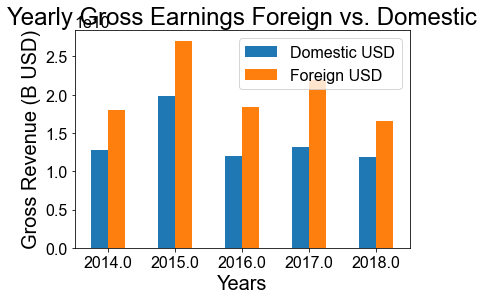

In [39]:
labels = ['2014', '2015', '2016', '2017', '2018']


ax = masterdf.groupby(xrange)['domestic_gross', 'foreign_gross'].sum().sort_values('release_date').plot.bar(stacked=False, title = 'Yearly Gross Earnings Foreign vs. Domestic', ylabel = 'Gross Revenue (B USD)', xlabel = 'Years', rot=0)

ax.legend(['Domestic USD', 'Foreign USD'])

sns.set_style('white')

Great! We clearly see a consistency with our mean an median predictions.As you can see in the figure, we can see the comparison of earnings between both markets all measured in the united states dollar.Foreign Markets seem to be a very lucrative entry point, and shouldn't be forgotten even in the early stages of starting a Movie Studio


# ANALYSIS OF RANKINGS, BUDGET AND WORLDWIDE PROFIT

# isolating data for years after 2014, the year where netflix started its own studio

In [277]:
#creating a new dataframe with only movies after 2014 - See appendix for data sourcing
master2014_df = master_merge[master_merge['year'] > 2013]

In [197]:
#seeing if rating is correlated with worldwide gross - not strongly enough (looking for correlation over 0.7)
master2014_df['averagerating'].corr(master2014_df['worldwide_gross'])

0.198065540652158

In [342]:
#writing down a hard copy of data before my manipulations (SEE APPENDIX)
master_merge.to_csv('master_merge.csv')

# Looking at top movies

In [350]:
#The top 20 most profitibale movies from 2014
a = master2014_df['worlwide_profit'].sort_values(ascending = False)[:20].sum()

In [351]:
#The rest (below top 20)
b = master2014_df['worlwide_profit'].sort_values(ascending = False)[20:].sum()

In [462]:
# percentage of total global profit from top 20 movies over 21% !!
a/(b+a)

0.21104172782432867

In [353]:
#top 20 out of how many? 882 total films
len(master2014_df['worlwide_profit'].sort_values(ascending = False))

882

In [355]:
#what are these movies? NOTICE HOW MANY OF THEM ARE PART OF FRANCHISES (17 or 85%)!!
master2014_df.sort_values('worlwide_profit', ascending = False)[:20]

,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,...,primary_profession,person_id_w,primary_name_w,birth_year_w,death_year_w,primary_profession_w,worlwide_profit,ROI,Biography,War
2623,avengers: infinity war,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018-04-27,Avengers: Infinity War,...,"producer,director,writer",nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",1748134200,5.0,False,False
6,jurassic world,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015-06-12,Jurassic World,...,"writer,producer,director",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director",1433854864,6.0,False,False
2041,furious 7,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",67,2015-04-03,Furious 7,...,"producer,writer,director",nm1490123,James Wan,1977.0,NaN,"producer,writer,director",1328722794,6.0,False,False
1134,black panther,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,2018-02-16,Black Panther,...,"director,writer,producer",nm3363032,Ryan Coogler,1986.0,NaN,"director,writer,producer",1148258224,5.0,False,False
2879,jurassic world: fallen kingdom,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",13,2018-06-22,Jurassic World: Fallen Kingdom,...,"director,writer,actor",nm1291105,J.A. Bayona,1975.0,NaN,"director,writer,actor",1135772799,6.0,False,False
1661,minions,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",73,2015-07-10,Minions,...,"actor,director,producer",nm1853544,Pierre Coffin,1967.0,NaN,"actor,director,producer",1086336173,14.0,False,False
1786,avengers: age of ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",4,2015-05-01,Avengers: Age of Ultron,...,"writer,producer,director",nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director",1072413963,3.0,False,False
2410,incredibles 2,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",44,2018-06-15,Incredibles 2,...,"miscellaneous,writer,director",nm0083348,Brad Bird,1957.0,NaN,"miscellaneous,writer,director",1042520711,5.0,False,False
649,aquaman,tt1477834,Aquaman,Aquaman,2018,143.0,"Action,Adventure,Fantasy",36,2018-12-21,Aquaman,...,"producer,writer,director",nm1490123,James Wan,1977.0,NaN,"producer,writer,director",986894640,6.0,False,False
2794,the fate of the furious,tt4630562,The Fate of the Furious,The Fate of the Furious,2017,136.0,"Action,Crime,Thriller",23,2017-04-14,The Fate of the Furious,...,"director,actor,producer",nm0336620,F. Gary Gray,1969.0,NaN,"director,actor,producer",984846267,3.0,False,False


## Isolating films that lost money

In [366]:
#isolating movies that lost money
lost_money_df = 
master2014_df[master2014_df['worlwide_profit'] < 0]

In [367]:
# checking the data - 210 films lost money
lost_money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 21 to 3861
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clean_title           210 non-null    object        
 1   movie_id              210 non-null    object        
 2   primary_title         210 non-null    object        
 3   original_title        210 non-null    object        
 4   start_year            210 non-null    int64         
 5   runtime_minutes       194 non-null    float64       
 6   genres                208 non-null    object        
 7   id                    210 non-null    int64         
 8   release_date          210 non-null    datetime64[ns]
 9   movie                 210 non-null    object        
 10  production_budget     210 non-null    int64         
 11  domestic_gross        210 non-null    int64         
 12  worldwide_gross       210 non-null    int64         
 13  foreign_gross     

## INVESTIGATING RATINGS

In [13]:
#Which are the top studios, sorted by worldwide_profit
top_studios=['BV', 'Uni.', 'Fox', 'WB', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'Wein.',
       'FoxS', 'STX', 'LG/S', 'Focus', 'SGem', 'TriS', 'UTV', 'A24', 'ORF',
       'Studio 8', 'GrtIndia', 'Rela.', 'W/Dim.', 'MGM', 'SPC', 'Yash', 'Eros',
       'EOne', 'BH Tilt', 'PNT', 'RTWC', 'IFC', 'Neon', 'BST', 'EC', 'PFR',
       'Affirm', 'Orch.', 'RAtt.', 'MBox', 'Cleopatra', 'LGP', 'Trib.',
       'Annapurna', 'BBC', 'Cohen', 'Drft.', 'Global Road', 'DR', 'CE', 'XL',
       'Gold.', 'Free', 'ENTMP', 'TFA', 'Saban', 'RLJ', 'Alc', 'Amazon', 'BSC',
       'BG', 'Magn.', 'FCW', 'KE', 'VE']



C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


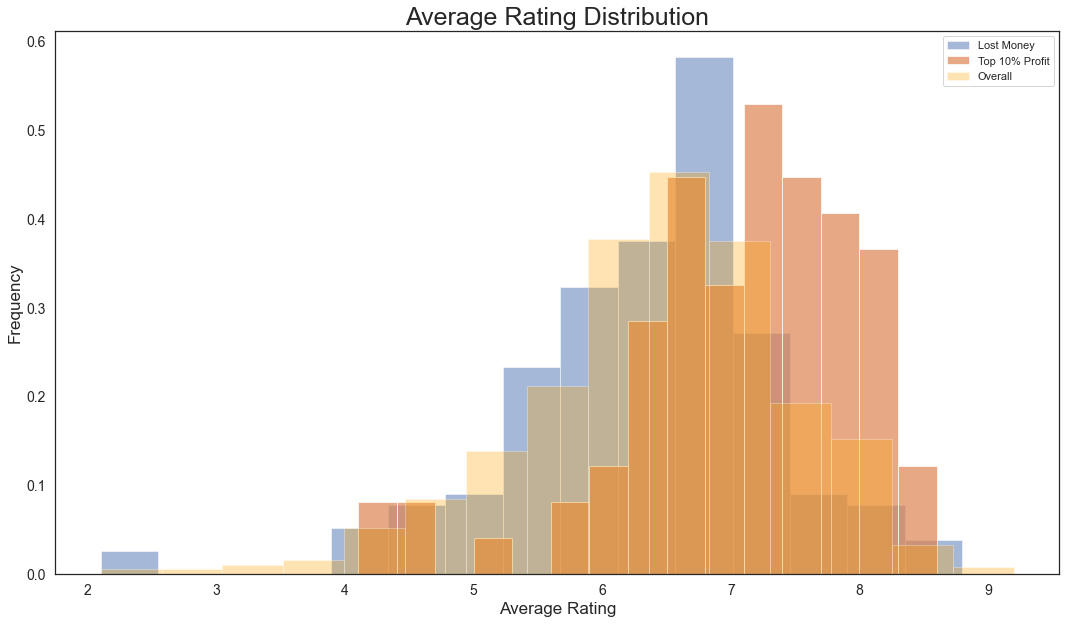

In [686]:
#Creating an overlaid plot with the ratings distributions for movies in the top 10 most profit, overall AND profit losers 
fig, ax = plt.subplots(figsize=(18,10))
ax.hist(lost_money_df['averagerating'], alpha=0.5, bins = 15, density=True)
ax.hist(master2014_df.sort_values('worlwide_profit', ascending = False)['averagerating'][:88], alpha = 0.7, bins=15 , density=True)
ax.hist(master2014_df['averagerating'], alpha = 0.3, color='orange', bins=15, density=True)
ax.legend(['Lost Money', 'Top 10% Profit', 'Overall'])
ax.set(title='Rating and Profit', xlabel='Average Rating', ylabel= 'Frequency')
ax.set_title('Average Rating Distribution', size=25);
ax.set_xlabel('Average Rating', size=17)
ax.set_ylabel('Frequency', size = 17)

plt.xticks(size=14)
plt.yticks(size = 14);


Notice above the overlap of distribution between the spread of ratings for movies that lost money and all movies.
here we see that ratings don't really seem to differ EXCEPT for the the top 10 movies, which is centered around a higher rating, 7.1 vs around 6.5

In [505]:
#Median rating for the top 10 percent of profitable movies = 7.15
master2014_df.sort_values('worlwide_profit', ascending = False)['averagerating'][:88].median()

7.15

In [506]:
#Mean rating for the top 10 percent of profitable movies = 7.03
master2014_df.sort_values('worlwide_profit', ascending = False)['averagerating'][:88].mean()

7.031707317073169

In [507]:
#MEDIAN AND MEAN RATINGS OF FILMS THAT LOST MONEY, respectively
print(lost_money_df['averagerating'].median(),lost_money_df['averagerating'].mean())

6.5 6.349132947976879


6.5 is also the median ditribution of the overall sample, master2014_df['averagerating'].median() = 6.5, because of this ratings only really seem to relate to profit for top earning movies

In [ ]:
#Isolating top 20 movies and their ratings average
top_20_df = master2014_df[master2014_df['worlwide_profit'] > 742000000]
top_20_df['averagerating'].mean()

## Exploration / analysis of production budget and worldwide gross

In [424]:
# strong correlation of production budget and 
master2014_df['production_budget'].corr(master2014_df['worlwide_profit'])

0.7013841018838237

In [459]:
#looking at the top ten percent of movies (worldwide profit)
master2014_df['worlwide_profit'].sort_values(ascending = False)[:88].sum()

55728977108

In [460]:
#the bottom 90% of movies (worldwide profit)
master2014_df['worlwide_profit'].sort_values(ascending = False)[88:].sum()

41505803959

In [461]:
# % total profit of top 10% movies --> 57
55728977108/(55728977108 + 41505803959)

0.5731382998600031

Notice above, the top 10% of movies make up a whopping 57.3% of total worldwide profit

C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

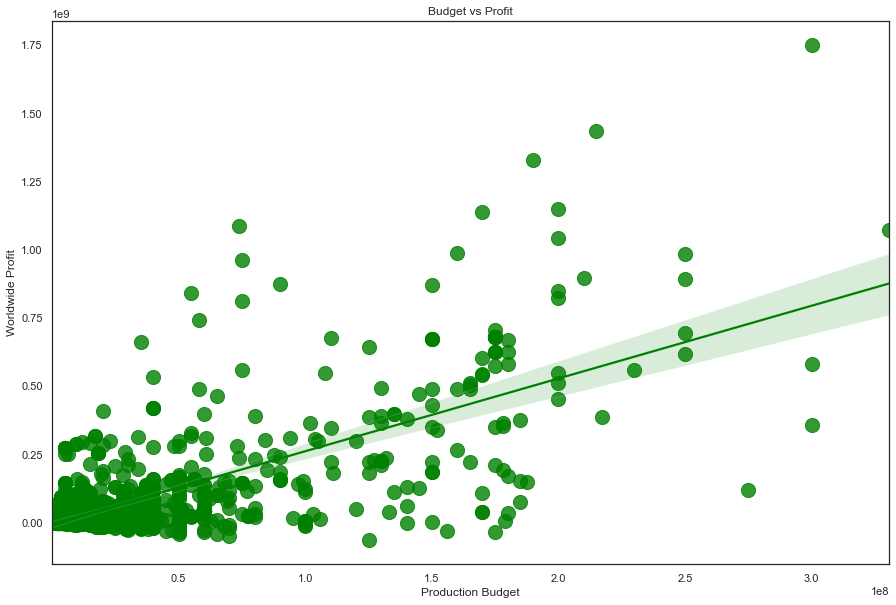

In [685]:
#Regression plot of production budget vs profit
gr = sns.regplot(master2014_df['production_budget'],master2014_df['worlwide_profit'], color = 'green',  
                 scatter_kws={'s':200}).set(title='Budget vs Profit', ylabel='Worldwide Profit', xlabel='Production Budget' )
sns.set(rc = {'figure.figsize':(15,6)})
sns.set_style('white');

Above shows the relationship between production budget and profit. From this we conclude that spending more money results 
in greater profit. This is strongly correlated. 

# CONCLUSION

### From our analysis, we can confirm that the three best tactics in terms of moving forward is to incorporate foreign markets into Microsoft's business strategy. Not only do foreign markets in total perform better than singularly domestics markets, but they also increase exposure for the brand. We found that ratings were not as highly associated with profit, but did find that 10% of the films from the sample contributed to 57% of overall profit within the movie industry. From this understanding we can say that film investment is something to consider in order to build a diverse film portfolio. Finally in terms of what genre to focus on, we found that animated genres preform 120% times better than their live action counter part, meaning that a animated comedy can perform much better than that of a live action film. Microsoft is a technology company, so we can hope that their technological expertise can propel them within the animation market.

# APPENDIX 1: CREATING A MASTER DATA SET

## Extracting IMDB movie basics table from SQL database

In [22]:
#connecting to IMDB daya
conn = sqlite3.connect('C:/Users/Nick/Documents/Flatiron/phase_1/project/data/im.db')

In [23]:
#SQL query the movie_basics data from IMDB database
movie_basics_df = pd.read_sql("""
SELECT * 
FROM movie_basics
""",conn )

In [24]:
#checking the resulting layout
movie_basics_df.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [25]:
#checking the general info of the movie_basics data 
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


## Extracting csvs to dataframes: box office mojo & the numbers to join with IMDB data

In [ ]:
#Loading the box office mojo into a pandas dataframe and checking
bom_raw_df = pd.read_csv('bom.movie_gross.csv')
bom_raw_df.head(2)

In [ ]:
#loading the "The Numbers" data into a pandas dataframe and checking
tn_raw_df = pd.read_csv('tn.movie_budgets.csv')
tn_raw_df.head(2)

### Create clean title columns for matching 1) MOVIE_BASICS from the imdb sql data

In [32]:
#making the movie titles lower case for better matching
movie_basics_df['clean_title'] = movie_basics_df['primary_title'].str.lower()

In [35]:
#move clean title to the front then rest index
movie_basics_df.set_index('clean_title', inplace = True)

In [37]:
#checking the layout of the dataframe
movie_basics_df.reset_index(inplace = True)
movie_basics_df.head(2)

,index,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,sunghursh,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,one day before the rainy season,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


### Preparing and joining the BOX OFFICE MOJO DATA

In [76]:
#making the movie titles lower case for better matching
bom_raw_df['clean_title'] = bom_raw_df['title'].str.lower()

In [80]:
#checking the layout of the dataframe
bom_raw_df.set_index('clean_title', inplace = True)
bom_raw_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
clean_title,,,,,
toy story 3,Toy Story 3,BV,415000000.0,652000000.0,2010
alice in wonderland (2010),Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


### tn_budgets (the numbers database) load and clean

In [50]:
#making the movie titles lower case for better matching
tn_raw_df['clean_title'] = tn_raw_df['movie'].str.lower()

In [64]:
#checking the layout of the dataframe
tn_raw_df.reset_index( inplace = True)
tn_raw_df.head(2)

,level_0,index,clean_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,0,avatar,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,1,pirates of the caribbean: on stranger tides,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


## feature engineering some standardized financial columns: worldwide gross, foreign gross

In [81]:
#Feature engineering a worldwide gross column for the box off mojo dataframe
bom_raw_df['worldwide_gross'] = bom_raw_df['foreign_gross'] + bom_raw_df['domestic_gross']

In [72]:
#having trouble fixing number formats so
tn_raw_df.to_csv('tn_numfix.csv')

In [73]:
#checking that number formats have been fixed
tn_fixed_df = pd.read_csv('tn_numfix.csv')
tn_fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         5782 non-null   int64 
 1   level_0            5782 non-null   int64 
 2   index              5782 non-null   int64 
 3   clean_title        5782 non-null   object
 4   id                 5782 non-null   int64 
 5   release_date       5782 non-null   object
 6   movie              5782 non-null   object
 7   production_budget  5782 non-null   int64 
 8   domestic_gross     5782 non-null   int64 
 9   worldwide_gross    5782 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 451.8+ KB


In [82]:
#now to engineer foreign gross for the numbers data base
tn_raw_df['foreign_gross'] = tn_raw_df['worldwide_gross'] + tn_raw_df['domestic_gross']


# NOW TO JOIN dataframes and further clean them

In [87]:
#dropping unneeded columns
tn_raw_df.drop(['level_0', 'index'], axis = 1, inplace =True)

In [88]:
#resetting the index before the join
tn_raw_df.set_index('clean_title', inplace=True)

In [89]:
#joining the numbers data and checking
tn_mbasics_merge = movie_basics_df.join(tn_raw_df, on='clean_title')
tn_mbasics_merge.head(2)

,index,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,0,sunghursh,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,one day before the rainy season,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
#droping unneeded column
tn_mbasics_merge.drop('index', axis=1, inplace=True)

In [90]:
#check the merge info
tn_mbasics_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146353 entries, 0 to 146143
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              146353 non-null  int64  
 1   clean_title        146353 non-null  object 
 2   movie_id           146353 non-null  object 
 3   primary_title      146353 non-null  object 
 4   original_title     146332 non-null  object 
 5   start_year         146353 non-null  int64  
 6   runtime_minutes    114581 non-null  float64
 7   genres             140940 non-null  object 
 8   id                 3897 non-null    float64
 9   release_date       3897 non-null    object 
 10  movie              3897 non-null    object 
 11  production_budget  3897 non-null    object 
 12  domestic_gross     3897 non-null    object 
 13  worldwide_gross    3897 non-null    object 
 14  foreign_gross      3897 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 1

In [96]:
#lets try merging this with bom before dropping null values
all_merged_df = tn_mbasics_merge.join(bom_raw_df, on='clean_title', rsuffix = 'bom')

In [101]:
#now to drop Null Values
all_merged_df.dropna(subset = ['release_date'], inplace =True)


In [102]:
#checking the merge and the drop
all_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3897 entries, 20 to 146078
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   clean_title         3897 non-null   object 
 1   movie_id            3897 non-null   object 
 2   primary_title       3897 non-null   object 
 3   original_title      3896 non-null   object 
 4   start_year          3897 non-null   int64  
 5   runtime_minutes     3401 non-null   float64
 6   genres              3824 non-null   object 
 7   id                  3897 non-null   float64
 8   release_date        3897 non-null   object 
 9   movie               3897 non-null   object 
 10  production_budget   3897 non-null   object 
 11  domestic_gross      3897 non-null   object 
 12  worldwide_gross     3897 non-null   object 
 13  foreign_gross       3897 non-null   object 
 14  title               1666 non-null   object 
 15  studio              1666 non-null   object 
 16  dom

In [105]:
#exploring the data before CLEANING and casting the financial columns as numerical data
all_merged_df['foreign_gross']

20                      $73,706$0
33        $122,133,227$70,433,227
40           $1,165,996$1,109,808
48             $9,313,302$720,828
54        $187,861,183$58,236,838
                   ...           
145843       $6,916,869$6,916,869
145937      $10,551,417$8,224,288
145986                       $0$0
146025       $1,110,511$1,017,107
146078    $165,720,921$81,562,942
Name: foreign_gross, Length: 3897, dtype: object

In [106]:
#looks like we need to take a closer look in excel and fix numbers
all_merged_df.to_csv('all_merged_fixup.csv')

In [107]:
#writing down our first working data set
final_merge_df = pd.read_csv('all_merged_fixup.csv')

In [108]:
#double checking our work
final_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3897 non-null   int64  
 1   clean_title         3897 non-null   object 
 2   movie_id            3897 non-null   object 
 3   primary_title       3897 non-null   object 
 4   original_title      3896 non-null   object 
 5   start_year          3897 non-null   int64  
 6   runtime_minutes     3401 non-null   float64
 7   genres              3824 non-null   object 
 8   id                  3897 non-null   int64  
 9   release_date        3897 non-null   object 
 10  movie               3897 non-null   object 
 11  production_budget   3897 non-null   int64  
 12  domestic_gross      3897 non-null   int64  
 13  worldwide_gross     3897 non-null   int64  
 14  foreign_gross       3897 non-null   int64  
 15  title               1666 non-null   object 
 16  studio

## Making a set list of unique genres for later feature engineering

In [109]:
#Making a list out of column values from a series of strings with commas within them i.e 'Action,Animation,Family'
# to a list with ['Action', 'Animation', 'Family']
genres_imdb_list= set(list([x for x in final_merge_df['genres']]))


In [110]:
#making an initial list of strings
genres_imdb_list = list(genres_imdb_list)
genres_working1 = []
for x in genres_imdb_list:
       genres_working1.append(str(x))


In [112]:
#Making the list a set of unique genres,and checking that its in the write format
genres_working2 = []
for x in genres_working1:
    for y in x.split(sep =','):
        genres_working2.append(y)
imdb_genres = list(set(genres_working2))
imdb_genres.pop(1)
imdb_genres.pop(-9)
imdb_genres

['Sport',
 'Crime',
 'News',
 'Romance',
 'Sci-Fi',
 'Western',
 'Horror',
 'Drama',
 'Family',
 'nan',
 'Mystery',
 'Musical',
 'Fantasy',
 'Adventure',
 'Documentary',
 'Thriller',
 'Comedy',
 'Reality-TV',
 'Music',
 'History',
 'Action',
 'Animation']

## NOW TO Feature Engineer BOOLEAN GENRE COLUMNS From the  genres list


In [ ]:
#creating boolean columns for each genre with a for loop and the list we created above
for x in imdb_genres:
    final_merge_df[x] = (final_merge_df['genres'].str.contains(x))


In [114]:
#Checking the success
final_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3897 non-null   int64  
 1   clean_title         3897 non-null   object 
 2   movie_id            3897 non-null   object 
 3   primary_title       3897 non-null   object 
 4   original_title      3896 non-null   object 
 5   start_year          3897 non-null   int64  
 6   runtime_minutes     3401 non-null   float64
 7   genres              3824 non-null   object 
 8   id                  3897 non-null   int64  
 9   release_date        3897 non-null   object 
 10  movie               3897 non-null   object 
 11  production_budget   3897 non-null   int64  
 12  domestic_gross      3897 non-null   int64  
 13  worldwide_gross     3897 non-null   int64  
 14  foreign_gross       3897 non-null   int64  
 15  title               1666 non-null   object 
 16  studio

In [115]:
#OK all set lets save this down
final_merge_df.to_csv('final_data_nk.csv')

## Now to merge in ratings info as well as teammate's data

In [8]:
#opening the previous data assembled
final_data_df = pd.read_csv('final_data_NK.csv')

In [3]:
#Checking the data
final_data_df.head(2)

,Unnamed: 0,Unnamed: 0.1,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,...,Fantasy,Adventure,Documentary,Thriller,Comedy,Reality-TV,Music,History,Action,Animation
0,0,20,foodfight!,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,...,False,False,False,False,True,False,False,False,True,True
1,1,33,mortal kombat,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,...,True,True,False,False,False,False,False,False,True,False


In [9]:
#deleting unecessary columns and checking the result
final_data_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace =True)
final_data_df.info()

In [4]:
#importing sqlite to connect and query from IMDB SQL database
import sqlite3
conn = sqlite3.connect('C:/Users/Nick/Documents/Flatiron/phase_1/project/data/im.db')

### pulling in ratings info from imdb sql database

In [5]:
#SQL Query and checking the layout of the data
movie_ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings
""", conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
#setting the index pre-join
movie_ratings_df.set_index('movie_id', inplace = True)

In [11]:
#joining the dataframes
ratings_join_df = final_data_df.join(movie_ratings_df, on='movie_id')

In [13]:
#checking the result
ratings_join_df.head()

,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,...,Documentary,Thriller,Comedy,Reality-TV,Music,History,Action,Animation,averagerating,numvotes
0,foodfight!,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,31-Dec-12,Foodfight!,...,False,False,True,False,False,False,True,True,1.9,8248.0
1,mortal kombat,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,18-Aug-95,Mortal Kombat,...,False,False,False,False,False,False,True,False,NaN,NaN
2,the overnight,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,19-Jun-15,The Overnight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,24.0
3,on the road,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,22-Mar-13,On the Road,...,False,False,False,False,False,False,False,False,6.1,37886.0
4,the secret life of walter mitty,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,25-Dec-13,The Secret Life of Walter Mitty,...,False,False,True,False,False,False,False,False,7.3,275300.0


In [19]:
#convering the release date column to datetime format for better functionality, then checking with .info()
ratings_join_df['release_date'] = pd.to_datetime(ratings_join_df['release_date'])
ratings_join_df.info()

### adding data assembled by teammate

In [43]:
#loading data from a teammate to be added 
chris_df2 = pd.read_csv('Merged_DataFrame_V2.csv')

In [45]:
#turning the movie title to lowercase for better matching in the join
chris_df2['clean_title'] = chris_df2['movie'].str.lower()

In [46]:
#resetting the data index assembled by team to be joined in master
chris_df2.set_index('clean_title', inplace = True)


In [48]:
#dropping unwanted columns, cleaning the dataframe
chris_df2.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [49]:
# checking the result
chris_df2.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,genre_ids
clean_title,,,,,,,
avatar,"Dec 18, 2009",Avatar,425,760,2776,2016,"[action, adventure, fantasy, sci-fi]"
pirates of the caribbean: on stranger tides,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410,241,1045,804,"[adventure, action, fantasy]"


In [50]:
#joining the data into the master
merged_all_df2 = ratings_join_df.join(chris_df2, on='clean_title', rsuffix = '_CH')

In [51]:
#checking the result
merged_all_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clean_title           3897 non-null   object        
 1   movie_id              3897 non-null   object        
 2   primary_title         3897 non-null   object        
 3   original_title        3896 non-null   object        
 4   start_year            3897 non-null   int64         
 5   runtime_minutes       3401 non-null   float64       
 6   genres                3824 non-null   object        
 7   id                    3897 non-null   int64         
 8   release_date          3897 non-null   datetime64[ns]
 9   movie                 3897 non-null   object        
 10  production_budget     3897 non-null   int64         
 11  domestic_gross        3897 non-null   int64         
 12  worldwide_gross       3897 non-null   int64         
 13  foreign_gross     

In [ ]:
#WRITING DOWN THE MASTER DATA FILE 
merged_all_df2.to_csv('master_data_raw.csv')

## NOW merging in directors info from IMDB database

In [92]:
#getting director info
director_df = pd.read_sql("""
SELECT * 
FROM directors
""", conn)

In [109]:
#checking the format of the data
director_df.head(2)

,person_id
movie_id,
tt0285252,nm0899854
tt0462036,nm1940585


In [96]:
#resetting the index pre 
director_df.set_index('movie_id', inplace = True)

In [97]:
#merging with director data
merge_wd_df = merged_all_df2.join(director_df, on = 'movie_id')

In [107]:
#cleaning by dropping any duplicates that match on movie id and release date
merged_wd_df = merged_wd_df.drop_duplicates(subset = ['movie_id', 'release_date'])

In [108]:
# checking to see they have been dropped
merged_wd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3897 entries, 0 to 3896
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clean_title           3897 non-null   object        
 1   movie_id              3897 non-null   object        
 2   primary_title         3897 non-null   object        
 3   original_title        3896 non-null   object        
 4   start_year            3897 non-null   int64         
 5   runtime_minutes       3401 non-null   float64       
 6   genres                3824 non-null   object        
 7   id                    3897 non-null   int64         
 8   release_date          3897 non-null   datetime64[ns]
 9   movie                 3897 non-null   object        
 10  production_budget     3897 non-null   int64         
 11  domestic_gross        3897 non-null   int64         
 12  worldwide_gross       3897 non-null   int64         
 13  foreign_gross     

In [120]:
#setting a new dataframe to work with
master_merge = merge_wd_df.copy()

## FEATURE ENGINEERING PROFIT and ROI

In [203]:
#creating worldwide profit from world gross less production budget
master_merge['worlwide_profit'] = master_merge['worldwide_gross'] - master_merge['production_budget']

In [204]:
#creating 
master_merge['ROI'] = master_merge['worlwide_profit'].astype('float')//master_merge['production_budget'].astype('float')

In [230]:
master_merge.drop('nan', axis = 1, inplace = True)

In [275]:
master_merge.drop(['%ROI', '% ROI', 'Reality-TV'], axis = 1, inplace = True)

Great! We clearly see a consistency with our mean an median predictions.As you can see in the figure, we can see the comparison of earnings between both markets all measured in the united states dollar.Foreign Markets seem to be a very lucrative entry point, and shouldn't be forgotten even in the early stages of starting a Movie Studio


# Appendix 2: supplemental investigation

## Recall Data for Possible Use in Presentation (Animation)

In [40]:
print(f'You can expect roughly {round(avg_animated_profit_increase, 2)} times more profit when animating ({round((avg_animated_profit_increase-1)*100, 2)}% increase).')
print(f'This comes to an average of ${round(avg_increase_per_film)}M more profit per film.')


You can expect roughly 2.2 times more profit when animating (119.53% increase).
This comes to an average of $160M more profit per film.


## Bonus Stats After Instructor Feedback on Slides (Animation)

In [41]:
# Check to make sure "fnl_merged_df" has 607 row and can still be used for calculations.
print(f' DataFrame still has {len(fnl_merged_df.index)} entries.')

# Calculate % of negative profit non-animated films from our set.
red_films = len(fnl_merged_df[(fnl_merged_df['Profit'] < 0) & (fnl_merged_df['Animation'] != True)])
red_film_rate = red_films / total_movies

# Calculate % of negative profit animated films from our set.
a_red_films = len(fnl_merged_df[(fnl_merged_df['Profit'] < 0) & (fnl_merged_df['Animation'] == True)])
a_red_film_rate = a_red_films / total_animated_movies

# Print results
print(f' Non-Animated films generate a loss rate of {round(red_film_rate,3)} or 12.1%')
print(f' Animated films generate a loss rate of {round(a_red_film_rate,3)} or 3.8%')
print(f' Non-Animated films are more than 3x more likely to generate a loss!')
print(f' The average Non-Animated profit is ${round(film_avg_profit)}M.')
print(f' The average Animated profit is ${round(a_film_avg_profit)}M.')

 DataFrame still has 607 entries.
 Non-Animated films generate a loss rate of 0.121 or 12.1%
 Animated films generate a loss rate of 0.038 or 3.8%
 Non-Animated films are more than 3x more likely to generate a loss!
 The average Non-Animated profit is $134M.
 The average Animated profit is $294M.
